# Capstone Project #
## Evan Campbell ##




![title](./pokemon_Capstone_title_picture.png)

## Pokemon Exploratory Data Analysis 
** Predicting the Type**  
** Data Source: https://www.kaggle.com/abcsds/pokemon/data**  

**Load packages:**

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# more packages import as needed
# imported by Evan Campbell
import re

<a id='load_data'></a>

### 1. Load the data

---

Import the csv into a pandas DataFrame.

In [3]:
#put you csv file in the same folder as this jupyter notebook file
#read in your data into a dataframe like df = pd.read_csv("yourfile.csv")
pokemon = pd.read_csv("Pokemon.csv")

### 2. Describe the basic format of the data and the columns

---


In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

## Data Description ##
** The data is split up into 13 different Fields of Data. The data represents a Pokemon's ID number, name, Stats, Generation, and Legendary Status.**
** The types of data are INTEGERS, STRINGS, and  BOOLEANS.**

Note: Some ID numbers are shown twice due to a Pokemon's ability to Mega-Evolve. This will be addressed.

---


In [6]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


** This tells the user every column except "Type 2" is filled out competely. **

<a id='drop'></a>

### 2. Drop unwanted columns

---




In [7]:
# There exists duplicate ID numbers in the set. I only want the original form of each pokemon.
# For this case that means I will be excluding Mega-evolutions and only use original forms of Pokemon.
# For ease, I will rename the column '#' to ID
pokemon.rename(columns={'#': "ID"}, inplace=True)
pokemon.drop_duplicates("ID", keep="first", inplace=True)


In [8]:
pokemon.head()

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


### 3. Clean corrupted columns (if there is any)

---


In [9]:
# Use this to inspect what content you have in columns marked 'object'
# df['column_name'].values 
# Columns labeled as 'objects' are Name, Type 1, and Type 2
pokemon[["Name", "Type 2"]]

,Name,Type 2
0,Bulbasaur,Poison
1,Ivysaur,Poison
2,Venusaur,Poison
4,Charmander,NaN
5,Charmeleon,NaN
6,Charizard,Flying
9,Squirtle,NaN
10,Wartortle,NaN
11,Blastoise,NaN
13,Caterpie,NaN


In [10]:
#Look into df.info() again
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 799
Data columns (total 13 columns):
ID            721 non-null int64
Name          721 non-null object
Type 1        721 non-null object
Type 2        350 non-null object
Total         721 non-null int64
HP            721 non-null int64
Attack        721 non-null int64
Defense       721 non-null int64
Sp. Atk       721 non-null int64
Sp. Def       721 non-null int64
Speed         721 non-null int64
Generation    721 non-null int64
Legendary     721 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 73.9+ KB



### 4. Determine how many observations are missing

---


In [11]:
# How many columns have how null values?
pokemon.isnull().sum()

ID              0
Name            0
Type 1          0
Type 2        371
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

**Drop the null values.** 


In [12]:
# Evan Campbell - For my case I am going to fill in null values
pokemon["Type 2"].fillna(value="None", inplace=True)

In [13]:
pokemon.head()

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False


### 5. Make the column names more descriptive

---



In [14]:
# Look at the original column names
# df.columns
pokemon.columns

Index(['ID', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [15]:
# Using the Dictionary method
renamed_columns = {
    'Total': 'Total Sum of Stats',
    'HP': "Hit Points"
}
pokemon.rename(columns=renamed_columns, inplace=True)
pokemon.head()

,ID,Name,Type 1,Type 2,Total Sum of Stats,Hit Points,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False


<a id='describe'></a>

### 6. Describe the summary statistics for the columns

---


In [16]:
pokemon.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,721.0,361.000000,208.279060,1.0,181.0,361.0,541.0,721.0
Total Sum of Stats,721.0,417.945908,109.663671,180.0,320.0,424.0,499.0,720.0
Hit Points,721.0,68.380028,25.848272,1.0,50.0,65.0,80.0,255.0
Attack,721.0,75.124827,29.070335,5.0,54.0,75.0,95.0,165.0
Defense,721.0,70.697642,29.194941,5.0,50.0,65.0,85.0,230.0
Sp. Atk,721.0,68.848821,28.898590,10.0,45.0,65.0,90.0,154.0
Sp. Def,721.0,69.180305,26.899364,20.0,50.0,65.0,85.0,230.0
Speed,721.0,65.714286,27.277920,5.0,45.0,65.0,85.0,160.0
Generation,721.0,3.323162,1.669873,1.0,2.0,3.0,5.0,6.0


### 7. Plot variables with potential outliers using boxplots.

---


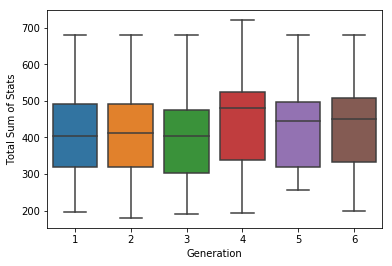

In [17]:
# Since Total Sum of Stats seems to be the best indicator of strongest pokemon I am going to view this 
# across each generation
sns.boxplot(x="Generation", y="Total Sum of Stats", data=pokemon)

**The medians stay relatively the same throughout each generation. Generation 3 seems to have the strongest pokemon in the game, while generation 2 seems to have the weakest. The games seem to have evenly distributed the strengths of each pokemon through each generation in the series.**


### 8.Other relevants plots 

---


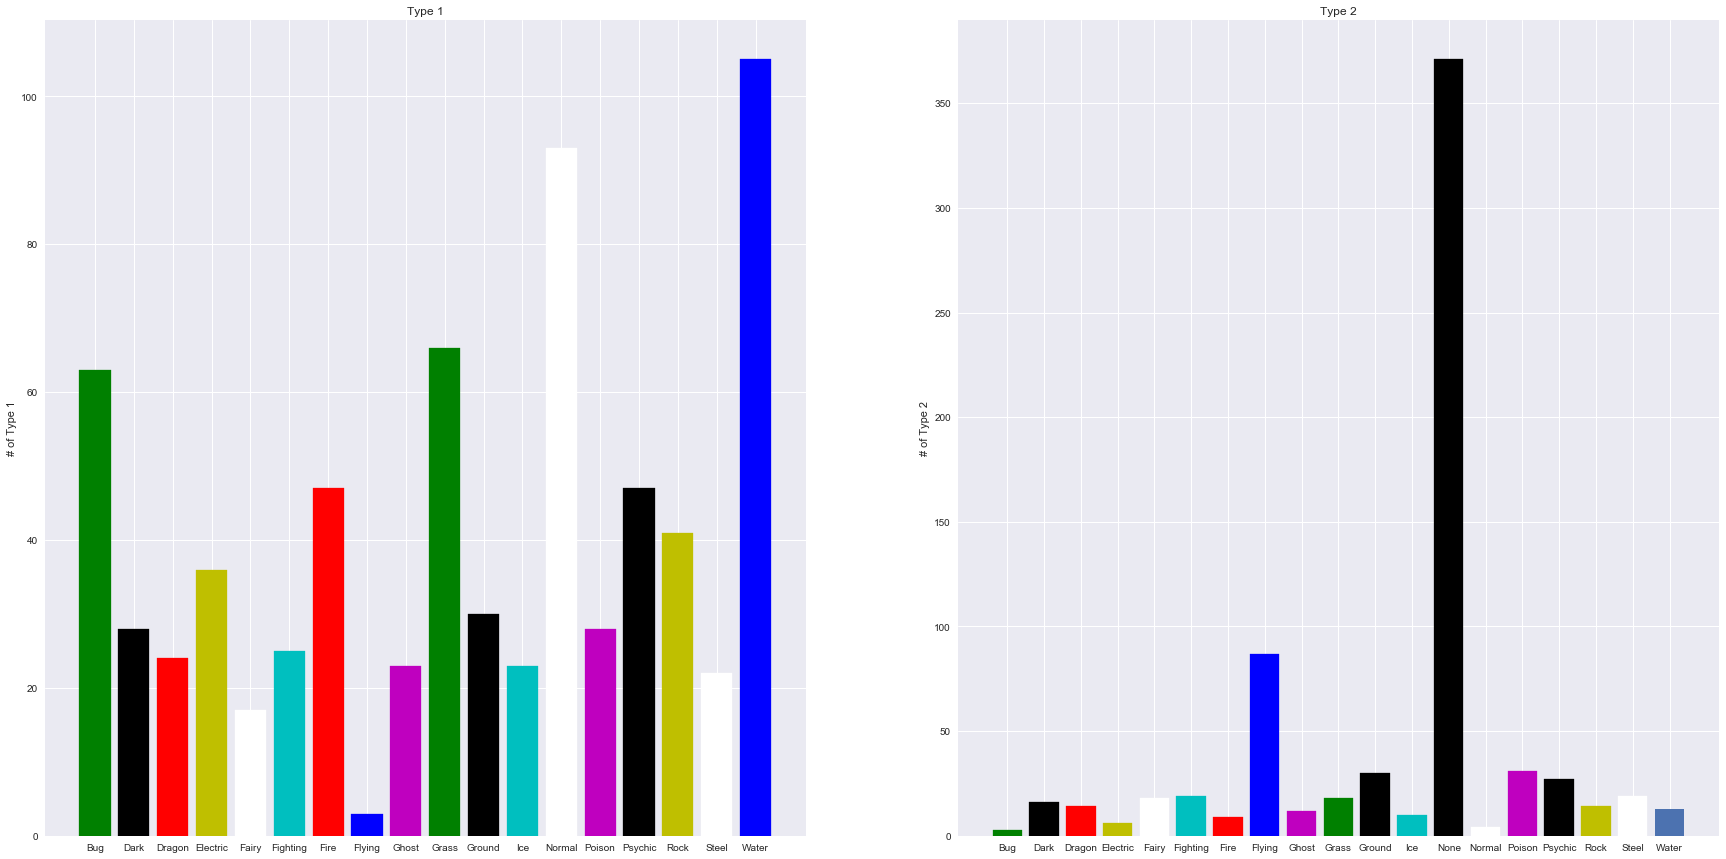

In [18]:
sns.set(rc={'figure.figsize':(30,15)})
# Type 1 Bar Chart
x1_sub = pokemon["Type 1"].unique()
y1 = pokemon.groupby("Type 1")["Name"].nunique()
x1 = sorted(x1_sub)

# Type 2 Bar Chart
x2_sub = pokemon["Type 2"].unique()
y2 = pokemon.groupby("Type 2")["Name"].nunique()
x2 = sorted(x2_sub)

# Layout of Graphs in Output
plt.subplot(1,2,1)
plot1 = plt.bar(x1, y1)
plt.title("Type 1")
plt.ylabel("# of Type 1")


plt.subplot(1,2,2)
plot2 = plt.bar(x2, y2)
plt.title("Type 2")
plt.ylabel("# of Type 2")

# Color Palette
type1_colors = ['g', 'k', 'r', 'y', 'w', 'c', 'r', 'b', 'm', 'g', 'k', 'c', 'w', 'm', 'k', 'y', 'w', 'b']
type2_colors = ['g', 'k', 'r', 'y', 'w', 'c', 'r', 'b', 'm', 'g', 'k', 'c', 'k', 'w', 'm', 'k', 'y', 'w']
for i in range(0, 18):
    plot1[i].set_color(type1_colors[i])
    plot2[i].set_color(type2_colors[i])

plt.show()


In [19]:
# Looking at the number of different types there is a lot of water type pokemon and only a few flying type. 



<a id='standardization'></a>

### 9. Standardizing variables

---

Rescaling variables is very common, and sometimes essential. For example, when we get to regularization of models the rescaling procedure becomes a requirement before fitting the model.

Here we'll rescale the variables using a procedure called "standardization", which forces the distribution of each variable to have a mean of 0 and a standard deviation of 1.

Standardization is not complicated:

    standardized_variable = (variable - mean_of_variable) / std_dev_of_variable
    
Note: Nothing else is changed about the distribution of the variable. It doesn't become normally distributed.


Also print out the mean and standard deviation of the original variable.

In [20]:
# select the columns out of your dataframe to be standardized (usually it will be your input features)
# X= df[['column1','column2', 'more if needed']]
#check its mean and standard deviation before standardizing
# X.mean()
# X.std()
X = pokemon[["Total Sum of Stats", "Hit Points", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
print(X.mean())
print(X.std())

Total Sum of Stats    417.945908
Hit Points             68.380028
Attack                 75.124827
Defense                70.697642
Sp. Atk                68.848821
Sp. Def                69.180305
Speed                  65.714286
dtype: float64
Total Sum of Stats    109.663671
Hit Points             25.848272
Attack                 29.070335
Defense                29.194941
Sp. Atk                28.898590
Sp. Def                26.899364
Speed                  27.277920
dtype: float64


In [21]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
#check its mean and standard deviation after standardizing
print(X_standardized.mean())
print(X_standardized.std())
#What difference did you see? Describe here
# The mean has become approximately 0 and the std is 1


4.927480830513871e-17
1.0


### 10. Correlation matrices

---

A great way to easily get a feel for linear relationships between your variables is with a correlation matrix.



####  Correlation


A much more common metric, and one directly calculable from the covariance, is the correlation.

Again, let $X$ and $Y$ be our two variables, with covariance $cov(X, Y)$ that we calculated above:

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$



#### The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using pandas DataFrame's built in `.corr()` function. Use it below on the boston dataset.

It is very useful to get a feel for what is related and what is not, which can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

In [22]:
# df.corr()
pokemon.corr()

,ID,Total Sum of Stats,Hit Points,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
ID,1.000000,0.160370,0.107512,0.144459,0.115090,0.126503,0.104998,0.028156,0.983329,0.135022
Total Sum of Stats,0.160370,1.000000,0.642628,0.704247,0.605786,0.723143,0.707223,0.548890,0.092868,0.481837
Hit Points,0.107512,0.642628,1.000000,0.425839,0.234177,0.362636,0.382569,0.170031,0.071545,0.258926
Attack,0.144459,0.704247,0.425839,1.000000,0.434022,0.339699,0.208322,0.332172,0.100852,0.296987
Defense,0.115090,0.605786,0.234177,0.434022,1.000000,0.202188,0.479991,-0.006849,0.061406,0.280285
Sp. Atk,0.126503,0.723143,0.362636,0.339699,0.202188,1.000000,0.493038,0.439548,0.076737,0.403238
Sp. Def,0.104998,0.707223,0.382569,0.208322,0.479991,0.493038,1.000000,0.236499,0.047802,0.367075
Speed,0.028156,0.548890,0.170031,0.332172,-0.006849,0.439548,0.236499,1.000000,0.003920,0.286082
Generation,0.983329,0.092868,0.071545,0.100852,0.061406,0.076737,0.047802,0.003920,1.000000,0.071875
Legendary,0.135022,0.481837,0.258926,0.296987,0.280285,0.403238,0.367075,0.286082,0.071875,1.000000


**Seaborn also has a great way of showing this to us visually, if colors stick out to you more than decimol values.**

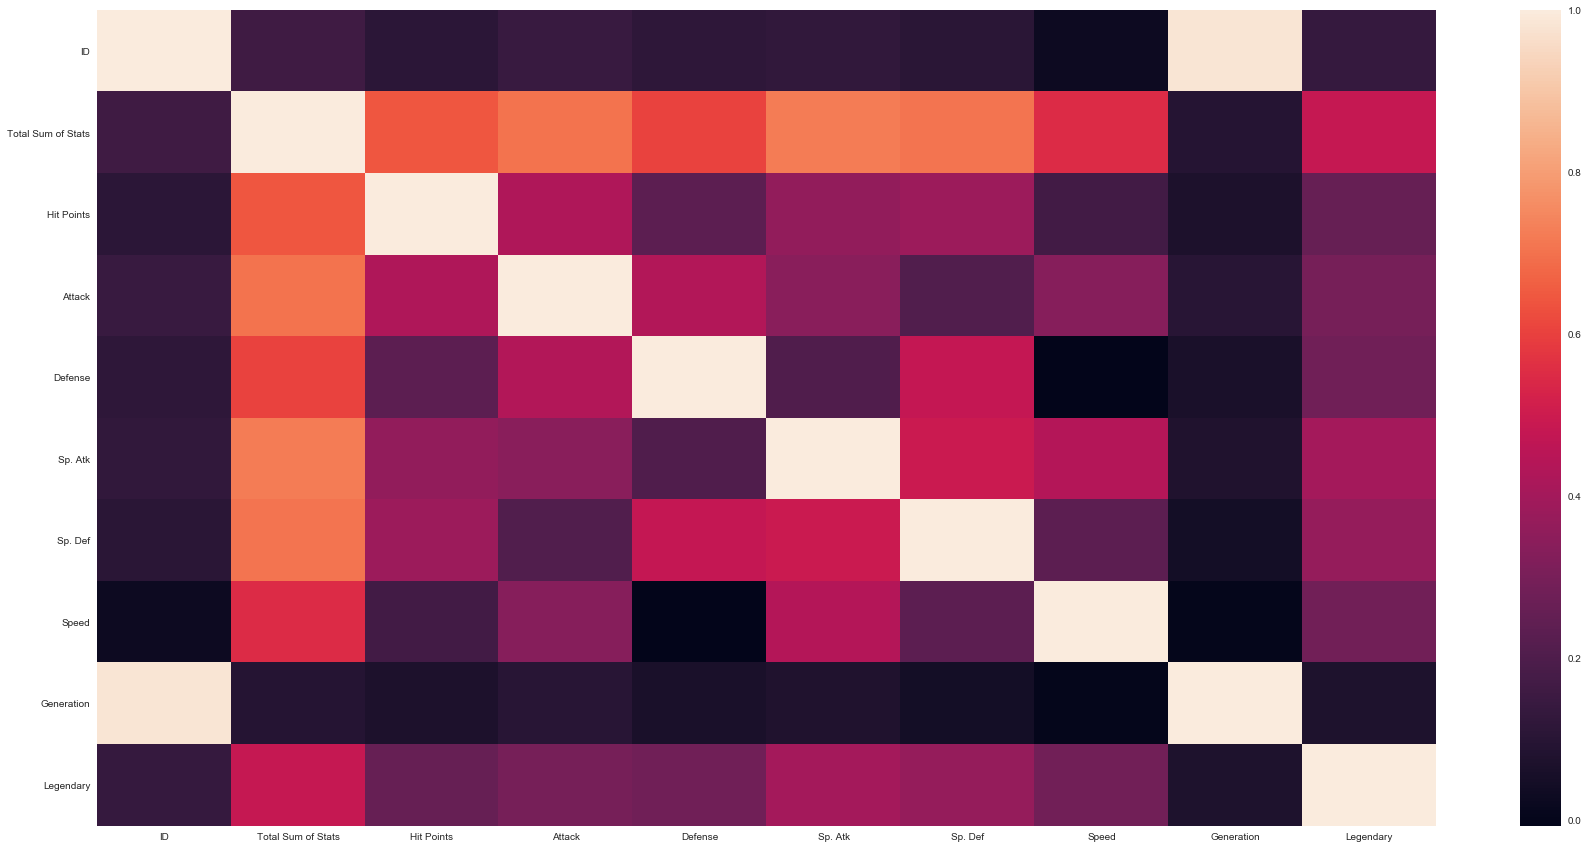

In [23]:
sns.heatmap(pokemon.corr())

## Type 1 Predictions ##
**I will try using the Train/Test method to see if I can predict a Pokemon's Type based off stats.**
**First I will take a look at Type 1 and Stats to see if there is any correlation between Type and stats**

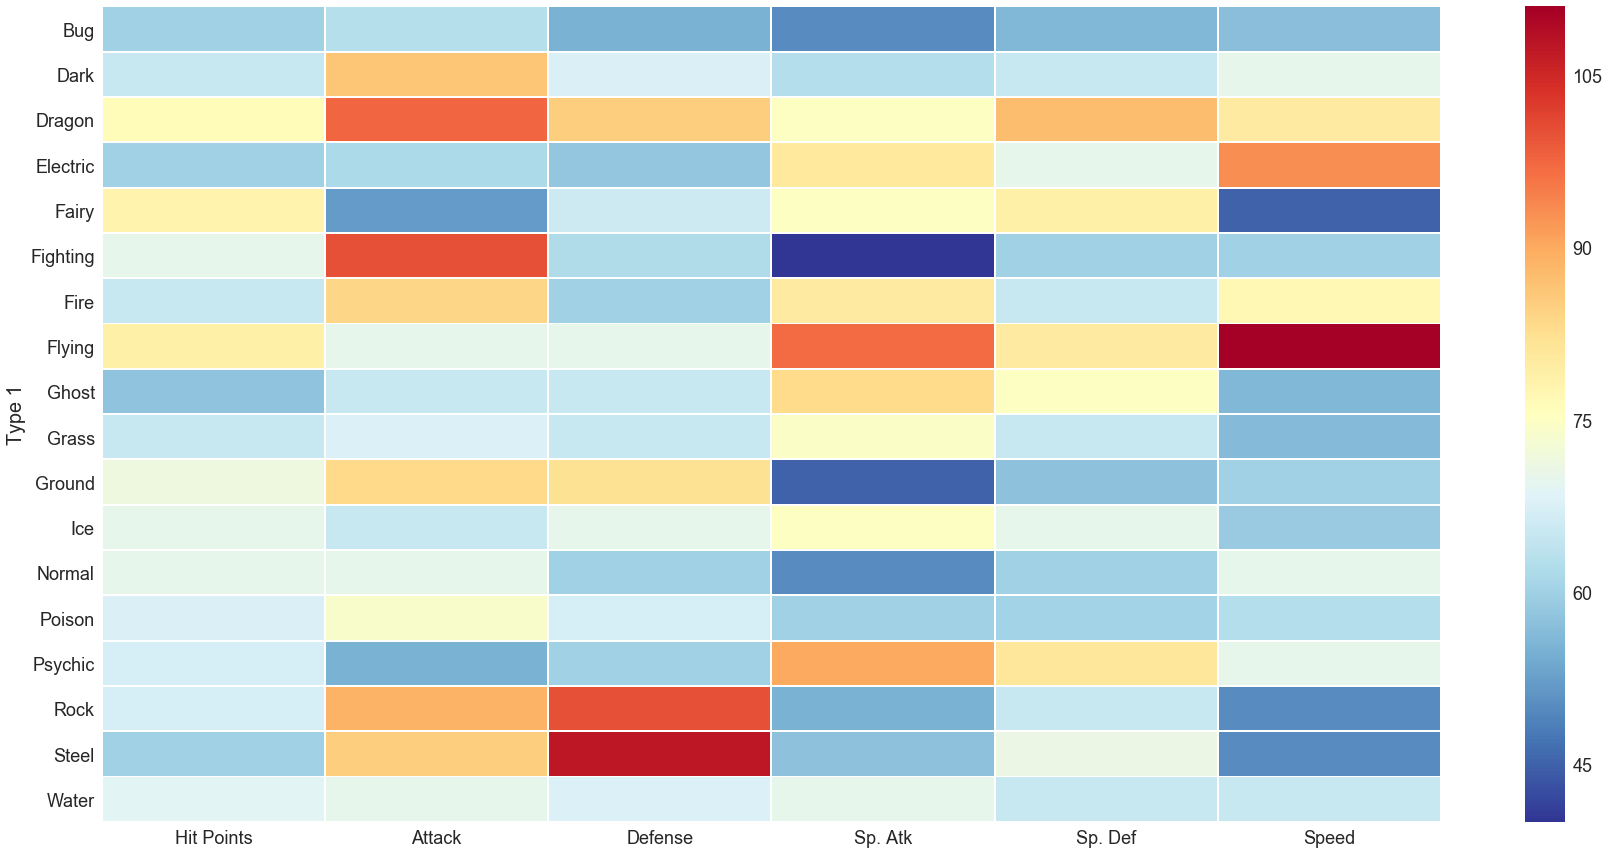

In [62]:
sns.set(font_scale=1.8)

sns.heatmap(
    pokemon.groupby('Type 1').median().loc[:, 'Hit Points':'Speed'], 
    linewidths=1,
    cmap='RdYlBu_r'
)


## No one line looks the same. This indicates that there exists variability between each type of pokemon. My prediction is that we can predict most of the types based on stats.##

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [64]:
# Change Type column to Integers
type_dict = {
    "Bug": 1,
    "Dark": 2,
    "Dragon": 3,
    "Electric": 4,
    "Fairy": 5,
    "Fighting": 6,
    "Fire": 7,
    "Flying": 8,
    "Ghost": 9,
    "Grass": 10,
    "Ground": 11,
    "Ice": 12,
    "Normal": 13,
    "Poison": 14,
    "Psychic": 15,
    "Rock": 16,
    "Steel": 17,
    "Water": 18
}

pokemon["Type Num"] = pokemon["Type 1"].map(type_dict)
pokemon.head()

,ID,Name,Type 1,Type 2,Total Sum of Stats,Hit Points,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type Num,predictions
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,10,10.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,10,10.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,10,NaN
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False,7,7.0
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False,7,NaN


In [65]:
featured_cols = ["ID", "Hit Points", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
X = pokemon[featured_cols]
y = pokemon["Type Num"]
print(type(X))
print(type(X.values))
print(type(y))
print(type(y.values))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
(721, 7)
(721,)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=12)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(504, 7)
(217, 7)
(504,)
(217,)


/Users/ev/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [67]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

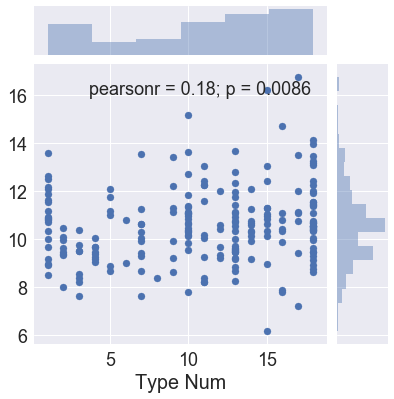

In [68]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat)

In [69]:
y_test

106    18
15      1
221    13
529     9
520     1
641    18
240    18
637    15
597    18
750    17
165    15
590    13
140    18
491     3
18      1
392     2
62      6
435     7
605     1
577    15
399    12
487    15
732     1
624     9
694     2
773    16
761    14
663     4
258     4
558     7
       ..
45     13
1      10
94     18
152    16
328    17
655    18
294    18
777    17
357    15
530    12
615     7
120    11
75     10
47     14
352     7
442    13
619     1
308     1
182     1
651    10
340     4
376    11
541    18
317    13
0      10
331    17
549     2
395    12
358    13
677     1
Name: Type Num, Length: 217, dtype: int64

In [70]:
pokemon["predictions"] = y_test


In [71]:
sum(pokemon["Type Num"] == pokemon["predictions"])/217

1.0